# スタッキング

- SibSp(兄弟、配偶者の数)、Parch(両親、子供の数)からFamilySizeを求めることが可能であることが分かった。

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# 前処理

- Ageの補完とSexを3分割は前回と同じ

In [5]:
middle = data["Name"].str.split(", ", expand=True)
middle = middle[1].str.split(".", expand=True)
data["Middle"] = middle[0]
data.loc[(data["Middle"] != "Mr") 
         & (data["Middle"] != "Mrs") 
         & (data["Middle"] != "Miss") 
         & (data["Middle"] != "Master"), "Middle"] = "Other"
data.loc[(data["Middle"] == "Other") 
         & (data["Age"] < data.loc[data["Middle"] == "Other", "Age"].dropna().median()), "Middle"] = "Other_pre"
data.loc[(data["Middle"] == "Other"), "Middle"] = "Other_post"
data.loc[data["Age"].isnull(), ["Middle", "Age"]]
for middle in ["Mr", "Mrs", "Miss", "Master", "Other_pre", "Other_post"]:
    data.loc[(data["Age"].isnull()) & (data["Middle"] == middle), "Age"] = data.loc[
        data["Middle"] == middle, "Age"].dropna().median()
data.loc[(data["Middle"] == "Mr") & (data["Sex"] == "male"), "Sex"] = "Mr"
data.loc[(data["Middle"] != "Mr") & (data["Sex"] == "male"), "Sex"] = "notMr"

### テストデータに対しても同じ操作を行う(補完に関しては前回と同じ)

In [6]:
middle = test["Name"].str.split(", ", expand=True)
middle = middle[1].str.split(".", expand=True)
test["Middle"] = middle[0]
test.loc[(test["Middle"] != "Mr") 
         & (test["Middle"] != "Mrs") 
         & (test["Middle"] != "Miss") 
         & (test["Middle"] != "Master"), "Middle"] = "Other"
test.loc[(test["Middle"] == "Other") 
         & (test["Age"] < test.loc[test["Middle"] == "Other", "Age"].dropna().median()), "Middle"] = "Other_pre"
test.loc[(test["Middle"] == "Other"), "Middle"] = "Other_post"
test.loc[test["Age"].isnull(), ["Middle", "Age"]]
for middle in ["Mr", "Mrs", "Miss", "Master", "Other_pre", "Other_post"]:
    test.loc[(test["Age"].isnull()) & (test["Middle"] == middle), "Age"] = test.loc[
        test["Middle"] == middle, "Age"].dropna().median()
test["Fare"] = test["Fare"].fillna(test.loc[test["Middle"] == "Mr", "Fare"].dropna().median())
test.loc[(test["Middle"] == "Mr") & (test["Sex"] == "male"), "Sex"] = "Mr"
test.loc[(test["Middle"] != "Mr") & (test["Sex"] == "male"), "Sex"] = "notMr"

### 特徴量FamilySizeの導入

In [7]:
data["FamilySize"] = data["SibSp"] + data["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

### Cabin

In [8]:
data["Cabin"] = data["Cabin"].fillna(0)
data.loc[data["Cabin"] != 0, "Cabin"] = 1
test["Cabin"] = test["Cabin"].fillna(0)
test.loc[test["Cabin"] != 0, "Cabin"] = 1

In [9]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Middle,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",Mr,22.0,1,0,A/5 21171,7.2500,0,S,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",Mr,35.0,0,0,373450,8.0500,0,S,Mr,1
5,6,0,3,"Moran, Mr. James",Mr,30.0,0,0,330877,8.4583,0,Q,Mr,1
6,7,0,1,"McCarthy, Mr. Timothy J",Mr,54.0,0,0,17463,51.8625,1,S,Mr,1
7,8,0,3,"Palsson, Master. Gosta Leonard",notMr,2.0,3,1,349909,21.0750,0,S,Master,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,0,S,Mrs,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,0,C,Mrs,2


### Embarked

In [10]:
data["Embarked"] = data["Embarked"].fillna("S")

# X, yに分ける

In [11]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Middle,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",Mr,22.0,1,0,A/5 21171,7.2500,0,S,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",Mr,35.0,0,0,373450,8.0500,0,S,Mr,1


In [12]:
X = data.drop(["PassengerId", "Survived", "Name", "SibSp", "Parch", "Ticket", "Middle"], axis=1)
y = data["Survived"]
X_test = test.drop(["PassengerId", "Name", "SibSp", "Parch", "Ticket", "Middle"], axis=1)

In [13]:
X.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize
0,3,Mr,22.0,7.2500,0,S,2
1,1,female,38.0,71.2833,1,C,2
2,3,female,26.0,7.9250,0,S,1
3,1,female,35.0,53.1000,1,S,2
4,3,Mr,35.0,8.0500,0,S,1


# ワンホットエンコーディング

- Pclass, Sex -> ワンホットエンコーディング

In [14]:
X = pd.get_dummies(X, columns=["Pclass"])
X = pd.get_dummies(X, columns=["Sex"])
X = pd.get_dummies(X, columns=["Embarked"])
X_test = pd.get_dummies(X_test, columns=["Pclass"])
X_test = pd.get_dummies(X_test, columns=["Sex"])
X_test = pd.get_dummies(X_test, columns=["Embarked"])

# Stacking

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

/Users/y_imagawa/.pyenv/versions/3.7.3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [19]:
clfs = []
for clf in [LogisticRegression(),
            SVC(),
            DecisionTreeClassifier(),
            RandomForestClassifier(),
            XGBClassifier(),
            LGBMClassifier()]:
    print(clf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
RandomForestClassifier(boots

# 提出用ファイルを作成

In [39]:
xgb.fit(X, y)
lgb.fit(X, y)
pred = xgb.predict(X_test)
submit = pd.DataFrame({"PassengerId":test["PassengerId"], "Survived":pred})
submit.to_csv("gender_submission.csv",index=False)

# 結果

# 重要度をみてみる

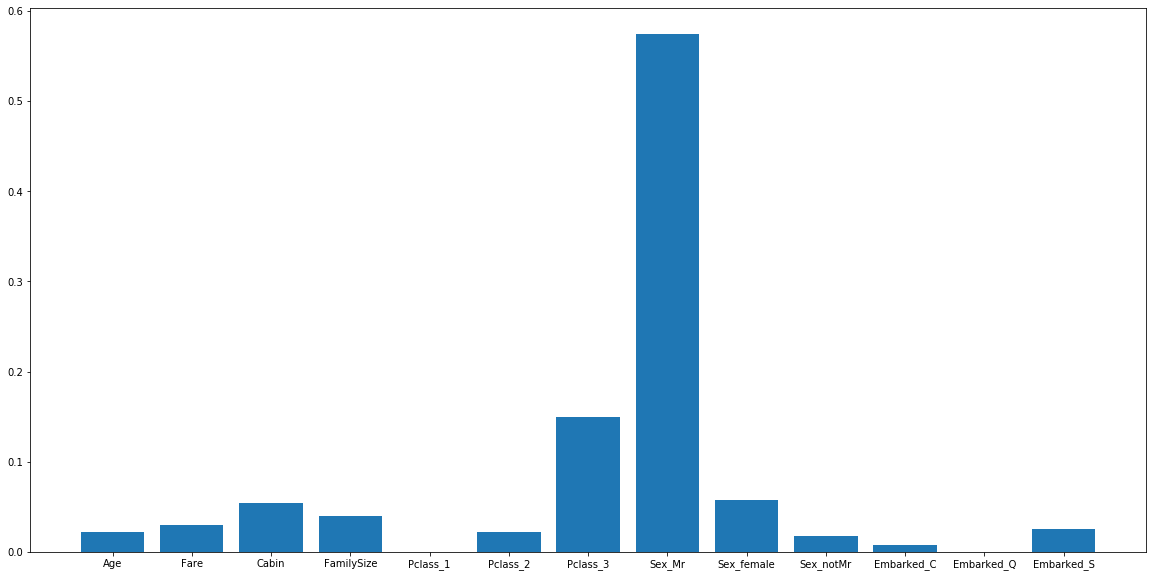

In [40]:
feature = xgb.feature_importances_
plt.figure(figsize=(20, 10))
plt.bar(range(len(feature)), feature, tick_label=X.columns)
plt.show()

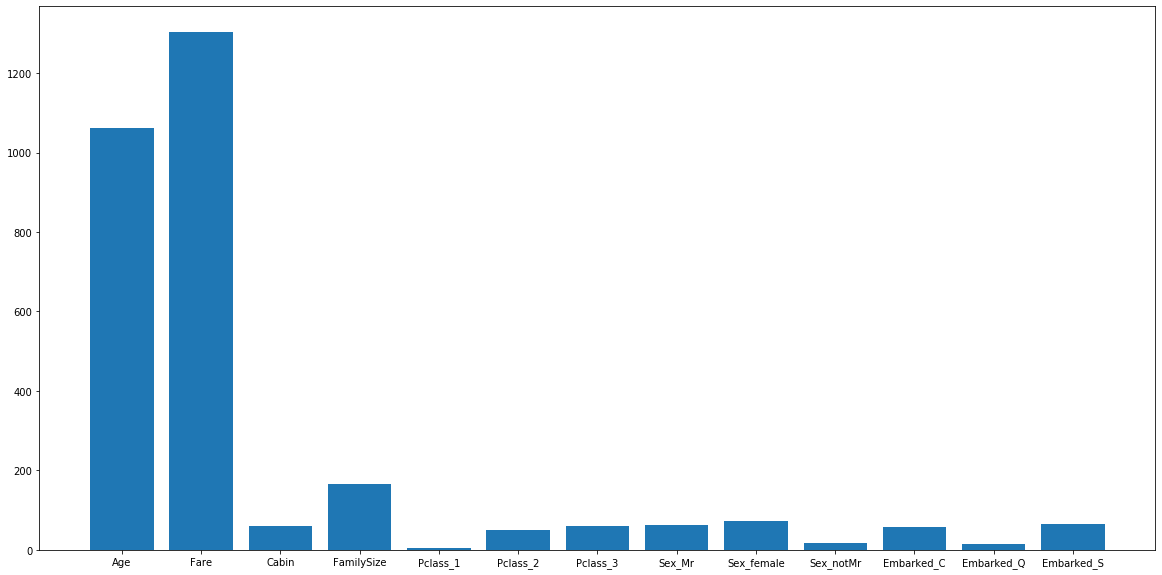

In [41]:
feature = lgb.feature_importances_
plt.figure(figsize=(20, 10))
plt.bar(range(len(feature)), feature, tick_label=X.columns)
plt.show()